#  Lending_Club - Default_Prediction

# Description

1. For the Loan Lending club, it's extremely important to know how's the loan repayment capacity for each loan applicant, and how much interest rate should be assigned to each loan application appropriately. 
    - Firstly, knowing the loan repayment capacity for each loan applicant could help it decide whether to "accept" or "deny" a loan application. 
    - Second, evaluating interest rate precisely could bring an additional incentive for those who are willing to "lend" money and also attain a balance between demand (borrowers) and supply (lenders).
2. As a result, some suitable metrics must be determined by looking at the dataset.
    - **Metrics**
        - loan status: To evaluate the loan repayment capacity for each loan applicant.
        - grade: A good categorical index to know the loan repayment capacity.
        - interest rate: A numerical feature playing a role of balancing demand and supply. 
3. In this jupyter notebook, we bulid models to predict **'Default'** with matric **'loan_status_binary'**.

## Main Tasks

1. Prepare the dataset 
2. Categorical Feature Transformation
    - 2.1 One-hot encoding
    - 2.2 Dummy features
3. Data preprocessing
    - 3.1 Split data into train and test sets
    - 3.2 Standarize data
4. Modeling
    - 4.1 Logistic Regression
        - 4.1.1 Hyper-parameter tuning using RandomizedSearchCV
        - 4.1.2 Confusion Matrix
        - 4.1.3 Features' coefficients by Logistic Regression
    - 4.2 Random Forest 
        - 4.2.1 Hyper-parameter tuning using RandomizedSearchCV 
        - 4.2.2 Confusion Matrix
        - 4.2.3 Feature importance by Random Forest
    - 4.3 Gradient Boosting Decision Tree
        - 4.3.1 Hyper-parameter tuning using RandomizedSearchCV
        - 4.3.2 Confusion Matrix
5. Summary
    - 5.1 Feature Conclusion
    - 5.2 Model Deployment

In [1]:
# Data structure packages
import pandas as pd
import numpy as np

# Machine Learning packages
import time
import math
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix
from PIL import Image

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 1. Prepare the dataset

In [2]:
# load data
loan = pd.read_csv("../data/final_LC_loan.csv")
# loan = pd.read_csv("LR_model_final_LC_loan.csv")

In [3]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,level_diff_last_issue_d,numeric_diff_next_issue_d,level_diff_next_issue_d,level_since_last_credit_pull,T_unique_title,days_since_issue,level_since_issue,days_between_max_issue_earliest_cr_line,level_between_max_issue_earliest_cr_line,group_state
0,7200.0,7200.0,7200.0,36 months,13.58,244.62,C,C2,8 years,RENT,...,6 month difference,184.0,6 month difference,Negative 4 mths,Other titles,0,0 mth,4748.0,14 yrs,west
1,12000.0,12000.0,12000.0,36 months,6.07,365.45,A,A2,10+ years,MORTGAGE,...,6 month difference,184.0,6 month difference,Negative 4 mths,president,0,0 mth,10286.0,35 yrs,northeast
2,3100.0,3100.0,3100.0,36 months,9.43,99.21,B,B1,10+ years,MORTGAGE,...,6 month difference,184.0,6 month difference,Negative 4 mths,manager,0,0 mth,6148.0,21 yrs,southeast
3,3200.0,3200.0,3200.0,36 months,7.96,100.22,A,A5,1 year,RENT,...,6 month difference,184.0,6 month difference,Negative 4 mths,Other titles,0,0 mth,1308.0,7 yrs,northeast
4,11000.0,11000.0,11000.0,36 months,7.34,341.37,A,A4,10+ years,OWN,...,6 month difference,184.0,6 month difference,Negative 4 mths,Other titles,0,0 mth,8491.0,28 yrs,west


In [4]:
loan.shape

(107864, 99)

#### Should exclude other response features before modeling

In [5]:
no_other_response_loan = loan.drop(['loan_status_binary','loan_status', 'grade', 'sub_grade', 'int_rate'], axis = 1)
no_other_response_loan.shape

(107864, 94)

## 2. Categorical Feature Transformation 
- 2.1 One-hot encoding
    - Transform categorical features into boolean values, either 0 or 1.
- 2.2 Dummy features
    - Transform categorical features containing more than two levels by creating dummy features.

### 2.1 One-hot encoding

In [6]:
# Collect column names 
one_hot_column = []
dummy_column = []

for each in no_other_response_loan:
    if no_other_response_loan[each].dtype == 'object':
        # Check NA values again for each categorical type of feature
        print(each, no_other_response_loan[each].isnull().sum())
        
        # Levels less than two: one-hot encoding
        if len(no_other_response_loan[each].unique()) <= 2:
            one_hot_column.append(each)
            
        # Levels more than two: dummy columns
        elif len(no_other_response_loan[each].unique()) > 2:
            dummy_column.append(each)

term 0
emp_length 0
home_ownership 0
verification_status 0
pymnt_plan 0
purpose 0
title 0
initial_list_status 0
application_type 0
hardship_flag 0
hardship_type 0
hardship_reason 0
hardship_status 0
hardship_loan_status 0
disbursement_method 0
debt_settlement_flag 0
settlement_status 0
days_between_issue_payment_plan_start_date 0
days_between_issue_hardship_start_date 0
days_between_issue_hardship_end_date 0
level_between_issue_settlement_date 0
level_between_max_issue_sec_earliest_cr_line 0
level_diff_last_issue_d 0
level_diff_next_issue_d 0
level_since_last_credit_pull 0
T_unique_title 0
level_since_issue 0
level_between_max_issue_earliest_cr_line 0
group_state 0


In [7]:
# One-hot encoding for categorical features containing two levels
le = LabelEncoder()
le_count = 0

for col in one_hot_column:
    print(col)
    le.fit(no_other_response_loan[col])
    no_other_response_loan[col] = le.transform(no_other_response_loan[col])
            
    # Keep track of how many columns were label encoded
    le_count += 1
            
print('%d columns were label encoded.' % le_count)

term
pymnt_plan
initial_list_status
application_type
hardship_flag
hardship_type
hardship_status
disbursement_method
debt_settlement_flag
settlement_status
10 columns were label encoded.


### 2.2 Dummy features

In [8]:
# Create dummy features
sum_len = 0
for col in dummy_column:
    sum_len += len(no_other_response_loan[col].unique())
    print(col, len(no_other_response_loan[col].unique()))
    
print('In total:', sum_len - len(dummy_column), 'will be additionally added.')

emp_length 12
home_ownership 4
verification_status 3
purpose 13
title 12
hardship_reason 3
hardship_loan_status 3
days_between_issue_payment_plan_start_date 3
days_between_issue_hardship_start_date 4
days_between_issue_hardship_end_date 3
level_between_issue_settlement_date 5
level_between_max_issue_sec_earliest_cr_line 11
level_diff_last_issue_d 9
level_diff_next_issue_d 5
level_since_last_credit_pull 10
T_unique_title 21
level_since_issue 3
level_between_max_issue_earliest_cr_line 10
group_state 5
In total: 120 will be additionally added.


In [9]:
# Seperate features into x (independent features) and y (dependent feature)
x = no_other_response_loan
y = loan.loan_status_binary.values

print(x.shape)
print(y.shape)

(107864, 94)
(107864,)


In [10]:
# Original x's dimension
print(x.shape)

# 94 + 120 = 214, correct dummy feature transformation!
x = pd.get_dummies(x, columns = dummy_column)
print(x.shape)

(107864, 94)
(107864, 214)


## 3. Data preprocessing
- 3.1 Split data into train and test sets
- 3.2 Standarize data

In [11]:
# Import metric functions from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [12]:
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    # names of metrics
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    
    # metrics of train
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    
    # metrics of test
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    
    # combine metrics from train and test
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [13]:
# Function of plotting a roc curve
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
# Combine get_performance_metrics and plot_roc_curve functions into one function
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### 3.1 Split data into train and test sets

In [15]:
# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 1)

### 3.2 Standarize data
- StandardScaler sklearn documentation: http://scikit-learn.org/stable/modules/preprocessing.html

In [16]:
# Before modeling, standardize each feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [17]:
print(x_train_std.shape)
print(x_test_std.shape)
print(len(y_train))
print(len(y_test))

(86291, 214)
(21573, 214)
86291
21573


## 4. Modeling
- 4.1 Logistic Regression
    - 4.1.1 Hyper-parameter tuning using GridSearchCV 
    - 4.1.2 Hyper-parameter tuning using RandomizedSearchCV
    - 4.1.3 Confusion Matrix
    - 4.1.4 Features' coefficients by Logistic Regression
- 4.2 Random Forest 
    - 4.2.1 Hyper-parameter tuning using GridSearchCV
    - 4.2.2 Hyper-parameter tuning using RandomizedSearchCV 
    - 4.2.3 Confusion Matrix
    - 4.2.4 Feature importance by Random Forest
- 4.3 Gradient Boosting Decision Tree
    - 4.3.1 Hyper-parameter tuning using GridSearchCV
    - 4.3.2 Hyper-parameter tuning using RandomizedSearchCV
    - 4.3.3 Confusion Matrix

### 4.1 Logistic Regression
- Logistic Regression sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

              train      test
metrics                      
AUC        0.974604  0.969999
Accuracy   0.993221  0.992537
Precision  0.941875  0.924786
Recall     0.832084  0.822188
f1-score   0.883582  0.870475


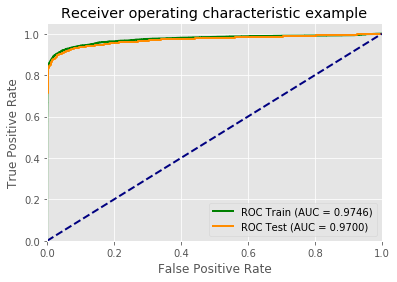

In [18]:
# Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(C=1.0, penalty='l2')

# test: 0.9710
train_test_model(LR_clf, x_train_std, y_train, x_test_std, y_test)

In [19]:
# one features' coefficients were pushed to 0 due to l2 regularization
sum(LR_clf.coef_.flatten() == 0)

1

### 4.1.1 Hyper-parameter tuning using RandomizedSearchCV - Logistic Regression

In [20]:
import random
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the Logistic Regression Classifier
LR_clf = LogisticRegression()

# Construct ranges for each parameter 
param_grid = {'penalty': ['l1','l2'],
              'C': np.linspace(0.01,2,20),
              'tol': [1e-3,1e-4,1e-5]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = RandomizedSearchCV(LR_clf, param_distributions=param_grid, cv=5, scoring='roc_auc',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 11535.95727610588


In [22]:
# Call back the optimal combination of parameters 
LR_best_clf = grid_obj.best_estimator_
LR_best_clf

LogisticRegression(C=1.8952631578947368, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.001, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.962942  0.967074
Accuracy   0.986546  0.985769
Precision  0.944019  0.944304
Recall     0.600450  0.566869
f1-score   0.734021  0.708452


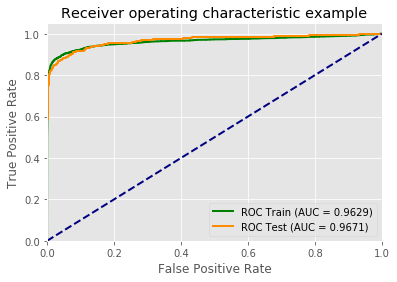

In [23]:
# See model performances
train_test_model(LR_best_clf, x_train, y_train, x_test, y_test)

### 4.1.3 Confusion Matrix - Logistic Regression
- sklearn confusion matrix documentation: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [24]:
# Use the best Logistic Regression model based on the results of hyper-parameter tuning
LR_best_clf = LogisticRegression(C=0.1, penalty='l1', tol=1e-05)
LR_best_clf.fit(x_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)

In [25]:
# Confusion Matrix of train data
tn, fp, fn, tp = confusion_matrix(y_train, LR_best_clf.predict(x_train_std)).ravel()
tn, fp, fn, tp

(83484, 139, 444, 2224)

In [26]:
# Confusion Matrix of test data 
tn, fp, fn, tp = confusion_matrix(y_test, LR_best_clf.predict(x_test_std)).ravel()
tn, fp, fn, tp

(20871, 44, 117, 541)

In [27]:
print('accuracy:', (tn + tp)/(tn + fp + fn + tp))
print('precision:', (tp)/(tp + fp))
print('recall:', (tp)/(fn + tp))

accuracy: 0.9925369675056784
precision: 0.9247863247863248
recall: 0.8221884498480243


In [28]:
LR_confusion_matrix = pd.DataFrame({'Predicted_loan_status_0':confusion_matrix(y_test, LR_best_clf.predict(x_test_std))[:,0],\
                                    'Predicted_loan_status_1':confusion_matrix(y_test, LR_best_clf.predict(x_test_std))[:,1]},\
                                   index = ['True_loan_status_0', 'True_loan_status_1'])

In [29]:
LR_confusion_matrix

,Predicted_loan_status_0,Predicted_loan_status_1
True_loan_status_0,20871,44
True_loan_status_1,117,541


### 4.1.4 Features' coefficients by Logistic Regression

In [30]:
# Positive Direction
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(10)

,feature,coeff
4,installment,3.386334
162,level_diff_next_issue_d_8 month difference,2.223528
155,level_diff_last_issue_d_4 month difference,0.940963
154,level_diff_last_issue_d_3 month difference,0.905998
153,level_diff_last_issue_d_2 month difference,0.810042
152,level_diff_last_issue_d_1 month difference,0.801931
72,numeric_diff_next_issue_d,0.783630
156,level_diff_last_issue_d_5 month difference,0.712216
159,level_diff_last_issue_d_NA month difference,0.376824
198,level_since_issue_2 mths,0.357711


In [31]:
# Negative Direction
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(10)

,feature,coeff
16,total_pymnt,-2.877729
158,level_diff_last_issue_d_More than 6 month diff...,-2.864104
18,total_rec_prncp,-1.329179
164,level_diff_next_issue_d_NA month difference,-0.605560
17,total_pymnt_inv,-0.171041
63,total_bc_limit,-0.170436
85,emp_length_< 1 year,-0.114941
7,dti,-0.095136
19,total_rec_int,-0.092025
79,emp_length_4 years,-0.091551


### 4.2 Random Forest
- Random Forest sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

              train      test
metrics                      
AUC        0.999677  0.957095
Accuracy   0.993638  0.992073
Precision  0.953359  0.924956
Recall     0.835082  0.805471
f1-score   0.890310  0.861089


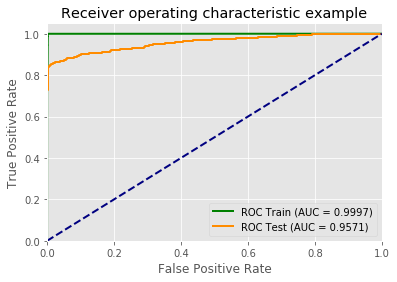

Grid search time : 84.23899006843567


In [32]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
RF_clf = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 5, random_state = 0)

# Dataset (without 4 response features): test: 0.9534
train_test_model(RF_clf, x_train_std, y_train, x_test_std, y_test)
print('Grid search time :',time.time() - start_time)

### 4.2.1 Hyper-parameter tuning using RandomizedSearchCV - Random Forest

In [33]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the Random Forest Classifier
RF_clf = RandomForestClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [50,100,150],
              'max_features': [i for i in range(1, 51, 10)],
              'max_depth': [i for i in range(1, 31, 10)],
              'min_samples_leaf': [i for i in range(1, 51, 10)]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = RandomizedSearchCV(RF_clf, param_distributions=param_grid, cv=5, scoring='roc_auc',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 2947.6638231277466


In [34]:
# Call back the optimal combination of parameters 
RF_best_clf = grid_obj.best_estimator_
RF_best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=21, max_features=41, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=41, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.973717  0.971533
Accuracy   0.993244  0.992537
Precision  0.941176  0.924786
Recall     0.833583  0.822188
f1-score   0.884118  0.870475


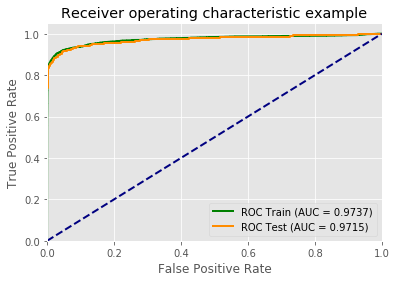

Random Forest execution time : 1393.7035791873932


In [35]:
# See model performances
start_time = time.time()
train_test_model(LR_best_clf, x_train_std, y_train, x_test_std, y_test)
print('Random Forest execution time :',time.time() - start_time)

### 4.2.2 Confusion Matrix - Random Forest

In [36]:
# Use the best Random Forest model based on the results of hyper-parameter tuning
RF_best_clf = RandomForestClassifier(n_estimators = 150, max_features = 41, max_depth = 21, min_samples_leaf = 11)
RF_best_clf.fit(x_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=21, max_features=41, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
# Confusion Matrix of train data
tn, fp, fn, tp = confusion_matrix(y_train, RF_best_clf.predict(x_train_std)).ravel()
tn, fp, fn, tp

(83489, 134, 436, 2232)

In [38]:
# Confusion Matrix of test data 
tn, fp, fn, tp = confusion_matrix(y_test, RF_best_clf.predict(x_test_std)).ravel()
tn, fp, fn, tp

(20871, 44, 118, 540)

In [39]:
print('accuracy:', (tn + tp)/(tn + fp + fn + tp))
print('precision:', (tp)/(tp + fp))
print('recall:', (tp)/(fn + tp))

accuracy: 0.9924906132665833
precision: 0.9246575342465754
recall: 0.8206686930091185


In [40]:
RF_confusion_matrix = pd.DataFrame({'Predicted_loan_status_0':confusion_matrix(y_test, RF_best_clf.predict(x_test_std))[:,0],\
                                    'Predicted_loan_status_1':confusion_matrix(y_test, RF_best_clf.predict(x_test_std))[:,1]},\
                                   index = ['True_loan_status_0', 'True_loan_status_1'])

In [41]:
RF_confusion_matrix

,Predicted_loan_status_0,Predicted_loan_status_1
True_loan_status_0,20871,44
True_loan_status_1,118,540


### 4.2.3 Feature importance by Random Forest

In [42]:
df_coeffs = pd.DataFrame(list(zip(x.columns, RF_best_clf.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'importance']
df_coeffs.head(10)

,feature,importance
71,numeric_diff_last_issue_d,0.135908
18,total_rec_prncp,0.113665
15,out_prncp_inv,0.102410
14,out_prncp,0.079935
20,last_pymnt_amnt,0.075236
164,level_diff_next_issue_d_NA month difference,0.074906
17,total_pymnt_inv,0.051284
16,total_pymnt,0.046720
157,level_diff_last_issue_d_6 month difference,0.034589
155,level_diff_last_issue_d_4 month difference,0.033829


### 4.3 Gradient Boosting Decision Tree
- GBDT sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

              train      test
metrics                      
AUC        0.993410  0.961794
Accuracy   0.996060  0.989895
Precision  0.953978  0.839506
Recall     0.916792  0.826748
f1-score   0.935015  0.833078


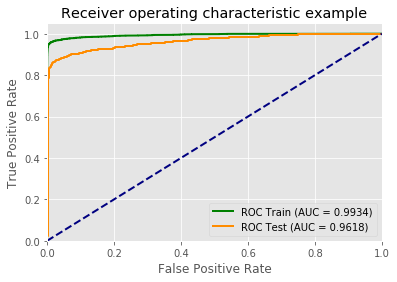

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Use a good start of parameter combination
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'max_features':0.8,
    'random_state': 0
}

clf = GradientBoostingClassifier(**parameters)

# Train and test model
# Dataset I (without 4 response features): test: 
# Dataset II (without 4 response features): test: 0.9671
train_test_model(clf, x_train, y_train, x_test, y_test)

### 4.3.1 Hyper-parameter tuning using RandomizedSearchCV - GBDT

In [44]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the GBDT Classifier
GBDT_clf = GradientBoostingClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [50,100,150],
              'max_depth': [3,4,5,6],
              'learning_rate': np.linspace(0.01,2,20),
              'subsample': [0.8,0.9],
              'max_features': [0.8,0.9]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = RandomizedSearchCV(GBDT_clf, param_distributions=param_grid, cv=5, scoring='roc_auc',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 9031.511683702469


In [45]:
# Call back the optimal combination of parameters 
GBDT_best_clf = grid_obj.best_estimator_
GBDT_best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11473684210526315, loss='deviance',
              max_depth=5, max_features=0.8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

              train      test
metrics                      
AUC        0.994253  0.954764
Accuracy   0.996489  0.989060
Precision  0.960296  0.822630
Recall     0.924663  0.817629
f1-score   0.942142  0.820122


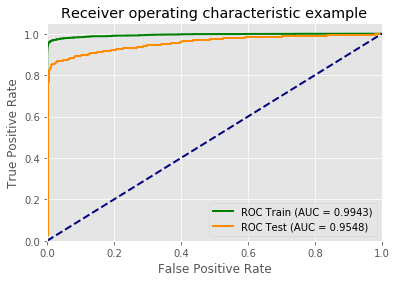

GBDT execution time : 182.2180209159851


In [46]:
# See model performances
start_time = time.time()
train_test_model(GBDT_best_clf, x_train_std, y_train, x_test_std, y_test)
print('GBDT execution time :',time.time() - start_time)

### 4.3.2 Confusion Matrix - GBDT

In [47]:
# Use the best GBDT model based on the results of hyper-parameter tuning
GBDT_best_clf = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.32,\
                                           subsample = 0.8, max_features = 0.9)
GBDT_best_clf.fit(x_train_std, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.32, loss='deviance', max_depth=5,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [48]:
# Confusion Matrix of train data
tn, fp, fn, tp = confusion_matrix(y_train, GBDT_best_clf.predict(x_train_std)).ravel()
tn, fp, fn, tp

(83482, 141, 272, 2396)

In [49]:
# Confusion Matrix of test data 
tn, fp, fn, tp = confusion_matrix(y_test, GBDT_best_clf.predict(x_test_std)).ravel()
tn, fp, fn, tp

(20797, 118, 127, 531)

In [50]:
print('accuracy:', (tn + tp)/(tn + fp + fn + tp))
print('precision:', (tp)/(tp + fp))
print('recall:', (tp)/(fn + tp))

accuracy: 0.9886432114216845
precision: 0.8181818181818182
recall: 0.8069908814589666


In [51]:
GBDT_confusion_matrix = pd.DataFrame({'Predicted_loan_status_0':confusion_matrix(y_test, GBDT_best_clf.predict(x_test_std))[:,0],\
                                    'Predicted_loan_status_1':confusion_matrix(y_test, GBDT_best_clf.predict(x_test_std))[:,1]},\
                                   index = ['True_loan_status_0', 'True_loan_status_1'])

In [52]:
GBDT_confusion_matrix

,Predicted_loan_status_0,Predicted_loan_status_1
True_loan_status_0,20797,118
True_loan_status_1,127,531


## 5 Summary 
- 5.1 Feature Conclusion
- 5.2 Model Deployment

### 5.1 Feature Conclusion
**Features' coefficients estimated by Logistic Regression - Positive Direction:**
- Once the **difference between issue and next payment day**, the **monthly payment owed by the borrower if the loan originates**, and **levels of day difference between issue and last payment day is less than 6 months** become larger, the higher probability that a loan applicant might be default.

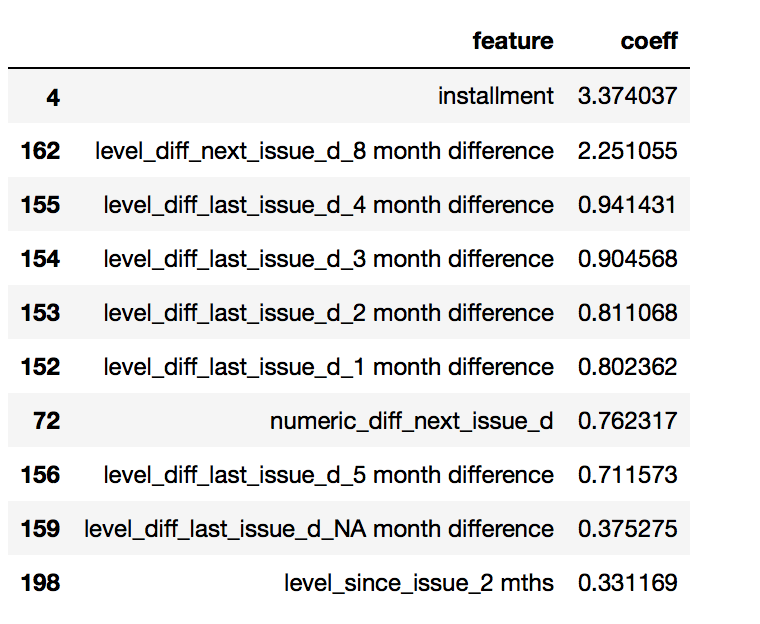

In [53]:
positive_coefficients_LR = Image.open("../image/Bad_loan_Features_positive_coefficients_LR.png")
positive_coefficients_LR

**Features' coefficients estimated by Logistic Regression - Negative Direction:**
- As long as the **difference between issue and last payment day  is more than 6 months**, **payment received to date for portion of total amount funded by investors**, and **principal received to date become larger**, the lower probability that a loan applicant might be default.

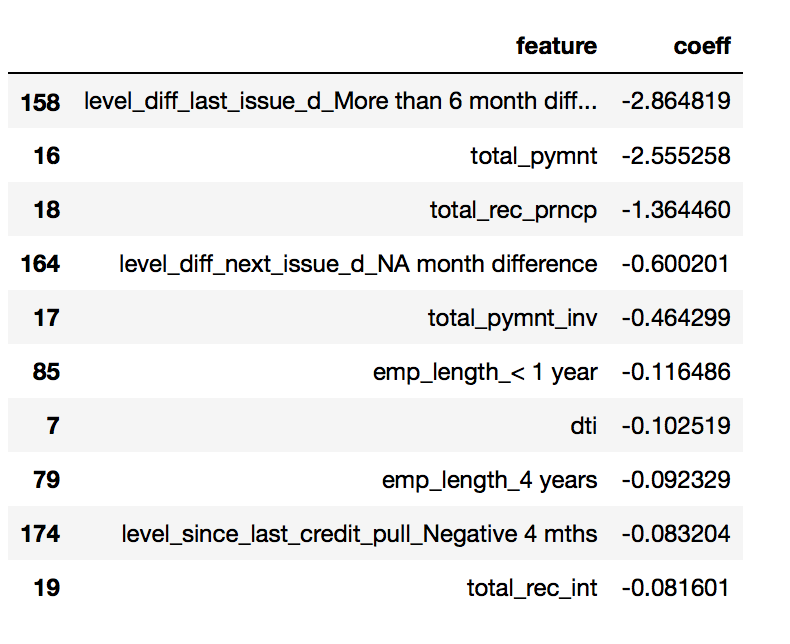

In [54]:
negative_coefficients_LR = Image.open("../image/Bad_loan_Features_negative_coefficients_LR.png")
negative_coefficients_LR

**Features' importances by Random Forest:**
- Six of the feature importances provided by Random Forest are overlapped with the results of feature importance by Logistic Regression. These top 10 features have a better prediction power compared with the rest of the features in Random Forest model.

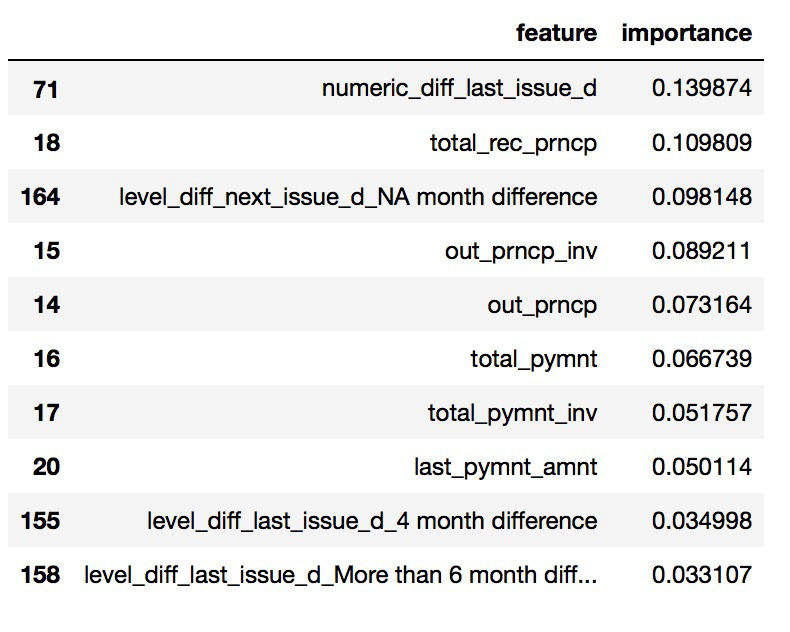

In [55]:
feature_importance_RF = Image.open("../image/Bad_loan_Features_importance_RF.png")
feature_importance_RF

### 5.2 Model Deployment (Metric evaulations):
For the Lending Club, it can decide a model deployment by a predefined objective. It might care a lot on predicting the correct **Default** applications, so a higher **recall** score becomes extremely important.

| Model | AUC | Accuracy | Precision | Recall |
| ---  | --- | --- | --- | --- |
| Logistic Regression | 0.9715 | **0.9926** | **0.9265** | **0.8237** |
| Random Forest | **0.9719** | 0.9925 | 0.9247 | 0.8207 | 
| GBDT | 0.9614 | 0.9888 | 0.8344 | 0.7887 |